In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr
import cartopy.crs as ccrs
from pyresample.geometry import AreaDefinition
from pyresample.geometry import GridDefinition
from pyresample import image, geometry, load_area, save_quicklook, SwathDefinition, area_def2basemap
from pyresample.kd_tree import resample_nearest
from scipy import spatial
sys.path.append('../saildrone/subroutines/')
from read_routines import read_all_usv, read_one_usv,add_coll_vars,get_filelist_l2p,get_orbital_data_l2p
import warnings
warnings.simplefilter('ignore') # filter some warning messages
from glob import glob

In [4]:
dir_data = 'C:/Users/gentemann/Google Drive/public/ALL_Saildrone_Data/' #'f:/data/cruise_data/saildrone/saildrone_data/'
dir_data_pattern = 'C:/Users/gentemann/Google Drive/public/ALL_Saildrone_Data/*west*.nc' 
#dir_data 'f:/data/cruise_data/saildrone/saildrone_data/'
#dir_data_pattern = 'f:/data/cruise_data/saildrone/saildrone_data/*.nc'

#get list of all filenames in directory
files = glob(dir_data_pattern)
print('number of file:',len(files))
#for ifile,file in enumerate(files):
#    print(ifile,file)
ds_usv = xr.open_dataset(files[4]).rename({'latitude':'lat','longitude':'lon'})


number of file: 13


In [163]:
ds_usv,name_usv = read_one_usv(files[0])
usv_day = ds_usv.time[0]
filelist_jpl = get_filelist_l2p(0, usv_day)
filelist_rss = get_filelist_l2p(1, usv_day)

file=filelist_jpl[0]
ii = file.find('_r')
iorb = int(file[ii+2:ii+7])
file_rss=[tem for tem in filelist_rss if str(iorb) in tem]
ds = xr.open_dataset(filelist_jpl[0])
ds['cellon'] = (ds['cellon'] + 180) % 360 - 180
ds.close()
ds2 = xr.open_dataset(file_rss[0])
ds2.close()


In [164]:
# RSS data is gridded onto a regular grid
# JPL data still on a swatch, but L2A reampling done to average obs together

In [165]:
print('rss',ds.cellon.min().data,ds.cellon.max().data)
print('jpl',ds2.lon.min().data,ds2.lon.max().data)

rss -179.97854614257812 179.99554443359375
jpl -151.5900115966797 143.0723876953125


In [166]:
ds2

<xarray.Dataset>
Dimensions:               (phony_dim_0: 76, phony_dim_1: 1624, phony_dim_2: 4)
Coordinates:
    lat                   (phony_dim_0, phony_dim_1) float32 ...
    lon                   (phony_dim_0, phony_dim_1) float32 nan nan ... nan nan
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    anc_dir               (phony_dim_0, phony_dim_1) float32 ...
    anc_spd               (phony_dim_0, phony_dim_1) float32 ...
    anc_sss               (phony_dim_0, phony_dim_1) float32 ...
    anc_sst               (phony_dim_0, phony_dim_1) float32 ...
    anc_swh               (phony_dim_0, phony_dim_1) float32 ...
    antazi_aft            (phony_dim_0, phony_dim_1) float32 ...
    antazi_fore           (phony_dim_0, phony_dim_1) float32 ...
    azi_aft               (phony_dim_0, phony_dim_1) float32 ...
    azi_fore              (phony_dim_0, phony_dim_1) float32 ...
    ice_concentration     (phony_dim_0, phony_dim_1) float32 ...
    inc_aft               (phony_dim_0, phony_dim_1) float32 ...
    inc_fore              (phony_dim_0, phony_dim_1) float32 ...
    land_fraction_aft     (phony_dim_0, phony_dim_1) float32 ...
    land_fraction_fore    (phony_dim_0, phony_dim_1) float32 ...
    n_h_aft               (phony_dim_0, phony_dim_1) float32 ...
    n_h_fore              (phony_dim_0, phony_dim_1) float32 ...
    n_v_aft               (phony_dim_0, phony_dim_1) float32 ...
    n_v_fore              (phony_dim_0, phony_dim_1) float32 ...
    nedt_h_aft            (phony_dim_0, phony_dim_1) float32 ...
    nedt_h_fore           (phony_dim_0, phony_dim_1) float32 ...
    nedt_v_aft            (phony_dim_0, phony_dim_1) float32 ...
    nedt_v_fore           (phony_dim_0, phony_dim_1) float32 ...
    num_ambiguities       (phony_dim_0, phony_dim_1) float32 ...
    quality_flag          (phony_dim_0, phony_dim_1) float32 ...
    row_time              (phony_dim_1) datetime64[ns] ...
    smap_ambiguity_dir    (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...
    smap_ambiguity_spd    (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...
    smap_high_dir         (phony_dim_0, phony_dim_1) float32 ...
    smap_high_dir_smooth  (phony_dim_0, phony_dim_1) float32 ...
    smap_high_spd         (phony_dim_0, phony_dim_1) float32 ...
    smap_spd              (phony_dim_0, phony_dim_1) float32 ...
    smap_sss              (phony_dim_0, phony_dim_1) float32 ...
    smap_sss_uncertainty  (phony_dim_0, phony_dim_1) float32 ...
    tb_h_aft              (phony_dim_0, phony_dim_1) float32 ...
    tb_h_bias_adj         (phony_dim_0, phony_dim_1) float32 ...
    tb_h_fore             (phony_dim_0, phony_dim_1) float32 ...
    tb_v_aft              (phony_dim_0, phony_dim_1) float32 ...
    tb_v_bias_adj         (phony_dim_0, phony_dim_1) float32 ...
    tb_v_fore             (phony_dim_0, phony_dim_1) float32 ...
Attributes:
    REVNO:                       18464
    REV_START_YEAR:              2018
    REV_START_DAY_OF_YEAR:       198
    Number of Cross Track Bins:  76
    Number of Along Track Bins:  1624
    REV_START_TIME:              2018-198T00:54:05.000
    REV_STOP_TIME:               2018-198T02:32:32.000
    TB_CRID:                     R16010
    L1B_TB_LORES_ASC_FILE:       /mirror/opsLOM/PRODUCTS/L1B_TB/004/2018/07/1...
    L1B_TB_LORES_DEC_FILE:       /mirror/opsLOM/PRODUCTS/L1B_TB/004/2018/07/1...
    Delta TBH Fore Ascending:    4.216304
    Delta TBH Aft Ascending:     4.216304
    Delta TBV Fore Ascending:    2.868979
    Delta TBV Aft Ascending:     2.868979
    Delta TBH Fore Decending:    4.216304
    Delta TBH Aft Decending:     4.216304
    Delta TBV Fore Decending:    2.868979
    Delta TBV Aft Decending:     2.868979
    QS_ICEMAP_FILE:              /testbed/saline/fore/smap-ancillary/ice/NCEP...
    TB_FLAT_MODEL_FILE:          /home/fore/smap-sds/config/dat/LBandTBFlat-v...
    TB_ROUGH_MODEL_FILE:         /testbed/saline/fore/winds-salinity/tb-winds...
    ANC_U10_F

(<cartopy.mpl.feature_artist.FeatureArtist at 0x19040968048>,
 Text(0.5, 1.0, 'JPL'))

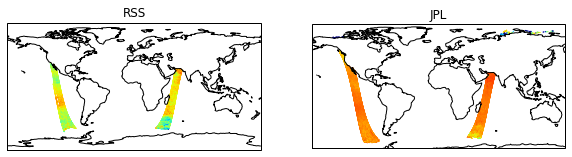

In [167]:
dds = ds.isel(look=0)
x,y,z = dds.cellon.data, dds.cellat.data, dds.sss_smap.data
fig = plt.figure(figsize=(10,5))#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(121,projection=ccrs.PlateCarree())
cs1 = ax.scatter(x, y, s=1.0, c=z, edgecolor='none', cmap='jet')
ax.coastlines(),ax.set_title('RSS')
dds = ds2
x,y,z = dds.lon.data, dds.lat.data, dds.smap_sss.data
ax1 = fig.add_subplot(122,projection=ccrs.PlateCarree())
cs1 = ax1.scatter(x, y, s=1.0, c=z, edgecolor='none', cmap='jet')
ax1.coastlines(),ax1.set_title('JPL')

In [59]:
x = ds['cellon'].isel(look=0).fillna(-89).data 
y = ds['cellat'].isel(look=0).fillna(-89).data 
z = ds['sss_smap'].isel(look=0).data 
lons,lats,data = x,y,z 
swath_def = SwathDefinition(lons, lats)
#map to this
grid_def = GridDefinition(lons=ds2.lon.fillna(-89),lats=ds2.lat.fillna(-89))

# Resample swath to a fixed 0.01 x 0.01 grid, represented by the variable grid_def:
# https://stackoverflow.com/questions/58065055/floor-and-ceil-with-number-of-decimals
#changed to be just the region of the usv cruise to make grid even smaller (hopefully)
#when working with global orbital data, work with usv BUT
#when working with granules use ds instead of ds_usv so you just do granule region
#grid_def_lon_min, grid_def_lon_max = np.round(ds_day.lon.min().data - 0.5 * 10**(-2), 2), np.round(ds_day.lon.max().data + 0.5 * 10**(-2), 2)
#grid_def_lat_min, grid_def_lat_max = np.round(ds_day.lat.min().data - 0.5 * 10**(-2), 2), np.round(ds_day.lat.max().data + 0.5 * 10**(-2), 2)
#grid_def_lons, grid_def_lats = np.arange(grid_def_lon_min,grid_def_lon_max+0.1,0.1), np.arange(grid_def_lat_max,grid_def_lat_min-0.1,-0.1)
#grid_mesh_lons,grid_mesh_lats = np.meshgrid(grid_def_lons,grid_def_lats)

# Since we have the lon and lat values for the area, we define a grid instead of an area:
# https://pyresample.readthedocs.io/en/latest/geo_def.html#griddefinition
#grid_def = GridDefinition(lons=grid_mesh_lons,lats=grid_mesh_lats)

result1 = resample_nearest(swath_def, data, grid_def, radius_of_influence=25000, fill_value=None)
da = xr.DataArray(result1,name='sss_smap',coords={'lat':ds2.lat,'lon':ds2.lon},dims=('phony_dim_0','phony_dim_1'))


In [168]:
ii,jj=30,400
print(ds2.smap_sss[30,400].data,ds2.lat[30,400].data,ds2.lon[ii,jj].data)
dist = ((ds.cellat.isel(look=0)-ds2.lat[ii,jj])**2+(ds.cellon.isel(look=0)-ds2.lon[ii,jj])**2)**.5
dd = ds.isel(dist.argmin(dim=["xdim_grid", "ydim_grid"]))

37.03806 -1.4345868 -110.84003


In [173]:
dd

<xarray.Dataset>
Dimensions:            (look: 2, polarization_2: 2, polarization_3: 3, polarization_4: 4)
Coordinates:
    time               (look) datetime64[ns] 2018-07-17T01:17:59.624144 2018-...
    cellat             (look) float32 -1.365 -1.365
    cellon             (look) float32 -110.9 -110.9
    lat                float32 -1.435
    lon                float32 -110.8
Dimensions without coordinates: look, polarization_2, polarization_3, polarization_4
Data variables:
    gland              (look) float32 1.277e-08 1.211e-05
    fland              (look) float32 1.277e-08 2.148e-08
    gice               float32 0.0
    fice               float32 0.0
    surtep             float32 297.0
    winspd             float32 6.206
    sss_ref            float32 35.06
    tran               float32 0.9899
    tbup               float32 2.751
    tbdw               float32 2.753
    windir             float32 125.0
    rain               float32 0.0
    solar_flux         float32 49.98
    temp_ant           (look, polarization_2) float32 362.0 362.0 364.7 364.8
    zang               (look) float32 84.82 93.15
    alpha              (look) float32 25.5 162.0
    eaa                (look) float32 326.2 189.6
    eia                (look) float32 40.12 40.14
    pra                (look) float32 -0.009447 0.006134
    sunglt             (look) float32 56.1 96.22
    monglt             (look) float32 24.47 53.36
    gallat             (look) float32 31.25 -40.72
    gallon             (look) float32 178.4 195.6
    sun_beta           (look) float32 91.56 87.5
    sun_alpha          (look) float32 60.39 60.46
    ta_ant_filtered    (look, polarization_4) float32 111.2 80.74 ... -0.8769
    ta_ant             (look, polarization_4) float32 nan nan nan ... nan nan
    dtemp_ant          (look, polarization_2) float32 -16.27 -16.27 ... -15.08
    ta_sun_dir         (look, polarization_3) float32 0.0 0.0 0.0 0.0 0.0 0.0
    ta_sun_ref         (look, polarization_3) float32 0.0 0.0 0.0 0.0 0.0 0.0
    ta_gal_dir         (look, polarization_3) float32 0.6335 ... 0.001999
    ta_gal_ref         (look, polarization_3) float32 0.4014 ... -0.01027
    ta_ant_calibrated  (look, polarization_4) float32 108.3 77.03 ... -0.4558
    ta_earth           (look, polarization_4) float32 107.8 76.5 ... -0.4558
    tb_toi             (look, polarization_4) float32 118.4 82.95 ... -0.3899
    tb_toa             (look, polarization_4) float32 118.5 82.9 ... -0.3899
    tb_toa_lc          (look, polarization_4) float32 118.5 82.9 ... -0.3899
    ta_lnd             (look, polarization_2) float32 0.0 0.0 0.0 0.0
    tb_sur             (look, polarization_4) float32 113.4 76.72 ... -0.3979
    tb_sur0            (look, polarization_4) float32 112.1 74.1 0.0 ... 0.0 0.0
    sss_smap           (look) float32 35.27 34.98
    sss_smap_40km      (look) float32 36.24 35.04
    iqc_flag           (look) int32 1024 1024
    tb_consistency     (look) float32 1.811 1.111
    ta_ant_exp         (look, polarization_4) float32 109.9 76.3 ... -0.1111
    tb_sur0_exp        (look, polarization_4) float32 114.0 73.22 ... 0.0 0.0
    pratot_exp         (look) float32 -1.532 1.218
Attributes:
    Conventions:                                        CF-1.6, ACDD-1.3
    title:                                              SMAP ocean surface sa...
    version:                                            V4.0 Validated Release
    processing_level:                                   L2C
    level:                                              Level 2: swath observ...
    resolution:                                         Spatial resolution: a...
    history:                                            created by T. Meissner
    date_created:                                       2019-07-28T20:51:12-0700
    date_modified:                                      2019-07-28T20:51:12-0700
    institution:                                        Remote Sensing System...
    source:          

In [174]:
dd.iqc_flag

<xarray.DataArray 'iqc_flag' (look: 2)>
array([1024, 1024])
Coordinates:
    time     (look) datetime64[ns] 2018-07-17T01:17:59.624144 2018-07-17T01:2...
    cellat   (look) float32 -1.365 -1.365
    cellon   (look) float32 -110.9 -110.9
    lat      float32 -1.435
    lon      float32 -110.8
Dimensions without coordinates: look
Attributes:
    long_name:      32-bit quality control flag
    units:          1
    flag_masks:     [    1     2     4     8    16    32    64   128   256   ...
    flag_meanings:  no_radiometer_observations_in_cell problem_with_OI strong...

In [140]:
i1=int(np.floor(99666/1560))
i2=99666-i1*1560
print(i1,i2,ds.cellat[i1,i2,0].data)

63 1386 -74.128235


(<cartopy.mpl.feature_artist.FeatureArtist at 0x190410fdac8>,
 Text(0.5, 1.0, 'JPL'))

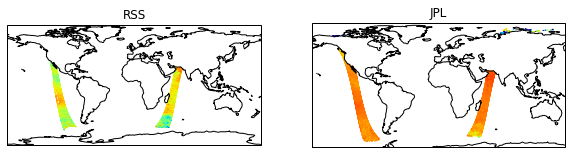

In [119]:
dds = ds.isel(look=0)
x,y,z = dds.cellon.data, dds.cellat.data, dds.sss_smap.data
fig = plt.figure(figsize=(10,5))#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(121,projection=ccrs.PlateCarree())
cs1 = ax.scatter(x, y, s=1.0, c=z, edgecolor='none', cmap='jet')
ax.coastlines(),ax.set_title('RSS'),ax.set_xlim(-180,180),ax.set_ylim(-85,85)
dds = ds2
x,y,z = dds.lon.data, dds.lat.data, dds.smap_sss.data
ax1 = fig.add_subplot(122,projection=ccrs.PlateCarree())
cs1 = ax1.scatter(x, y, s=1.0, c=z, edgecolor='none', cmap='jet')
ax1.coastlines(),ax1.set_title('JPL')

## An example showing how the using matplotlib maps orbital data quickly and easily


In [ ]:
#ds_tem = xr.open_dataset('C:/Users/gentemann/Google Drive/public/2019_saildrone/saildrone_arctic_sd1037_2019.nc')
#ds_tem2 = xr.open_dataset('f:/data/cruise_data/saildrone/2019_arctic/post_mission/saildrone-gen_5-arctic_misst_2019-sd1037-20190514T230000-20191011T183000-1_minutes-v1.1575487464625.nc')
#ds_tem = ds_tem.isel(row=slice(60,-1))
#ds_tem2 = ds_tem2.isel(obs=slice(60*24,-1))
#print(ds_tem.time[0].data,ds_tem.time[-1].data)
#print(ds_tem2.time[0,0].data,ds_tem2.time[0,-1].data)
#ds
#ds_usv

(25.0, 40.0)

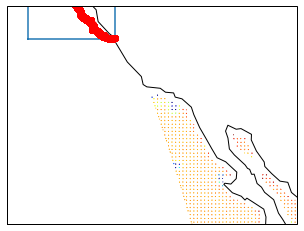

In [4]:
adir = 'C:/Users/gentemann/Google Drive/public/2019_saildrone/'
ds_usv = xr.open_dataset(files[4]).rename({'latitude':'lat','longitude':'lon'})
#file = 'F:/data/sat_data/smap/SSS/L2/JPL/V4.3/2016/002/SMAP_L2B_SSS_04909_20160102T044855_R16010_V4.3.h5'
file = 'F:/data/sat_data/smap/SSS/L2/RSS/V3/40km/2018/115/RSS_SMAP_SSS_L2C_40km_r17250_20180425T004136_2018115_FNL_V03.0.nc'
ds = xr.open_dataset(file)
ds.close()
x = ds.cellon.data
y = ds.cellat.data
z = ds.sss_smap.data
ax = plt.axes(projection=ccrs.PlateCarree())
cs1 = ax.scatter(x, y, s=1.0, c=z, edgecolor='none', cmap='jet')
minlon,maxlon,minlat,maxlat = ds_usv.lon.min().data,ds_usv.lon.max().data,ds_usv.lat.min().data,ds_usv.lat.max().data
ax.plot([minlon,maxlon,maxlon,minlon,minlon],[minlat,minlat,maxlat,maxlat,minlat])
#ax.plot(ds.cellon[jj,ii],ds.cellat[jj,ii,0],'b*')
#ax.plot(ds_usv.lon[1000],ds_usv.lat[1000],'ro')
ax.plot(ds_usv.lon,ds_usv.lat,'ro')
ax.coastlines()
ax.set_xlim(-130,-110)
ax.set_ylim(25,40)

# test read in a file to look at dimension names

In [ ]:
#file = 'F:/data/sat_data/smap/SSS/L2/JPL/V4.3/2016/002/SMAP_L2B_SSS_04909_20160102T044855_R16010_V4.3.h5'
file = 'F:/data/sat_data/smap/SSS/L2/RSS/V4/SCI/2018/115/RSS_SMAP_SSS_L2C_r17250_20180425T004136_2018115_FNL_V04.0.nc'
ds = xr.open_dataset(file,decode_cf=False)
ds

# What lon range for satellite & insitu? are we going 0-360 or -180 to 180?

In [ ]:
print(ds.cellon.min().data,ds.cellon.max().data)
print(ds_usv.lon.min().data,ds_usv.lon.max().data)

## First let's figure out what orbital files actually have data in our area of interest.  To do this, use the pyresample software

- read in the in situ data
- calculate the in situ min/max dates to know what files to check

Now we have our time of interest

- loop through the satellite data
- calculate the in situ min/max lat/lon on the same day to define a small box of interest
- use pyresample to map the data onto a predefined 0.1 deg resolution spatial grid
- subset the gridded map to the area of interest
- see if there is any valid data in that area
- if there is any valid data, go to next step

## Use the fast search kdtree which is part of pyresample software, but I think maybe comes originally from sci-kit-learn.

- read in the in situ data
- read in a single orbit of satellite data
- kdtree can't handle it when lat/lon are set to nan.  I frankly have no idea why there is orbital data for both the JPL and RSS products that have nan for the geolocation.  That isn't normal.  But, okay, let's deal with it.  
- stack the dataset scanline and cell positions into a new variable 'z'
- drop all variables from the dataset when the longitude is nan
- set up the tree
- loop through the orbital data
- only save a match if it is less than 0.25 deg distance AND time is less than any previous match
- save the satellite indices & some basic data onto the USV grid




In [ ]:
def get_time_start_end(isat,ds):
    if isat==0:
        orbit_time = np.datetime64(ds.attrs['time_coverage_start'])-np.timedelta64(24,'h') #changed to 24 hr for sss
        orbit_time2 = np.datetime64(ds.attrs['time_coverage_end'])+np.timedelta64(24,'h')  
    if isat==1:
        orbit_time = ds.time[0].data-np.timedelta64(12,'h')
        orbit_time2 = ds.time[-1].data+np.timedelta64(12,'h')        
    return orbit_time,orbit_time2

area_def = load_area('areas.cfg', 'pc_world')
rlon=np.arange(-180,180,.1)
rlat=np.arange(90,-90,-.1)


In [ ]:
iname = 1  #set number of cruise to process
for isat in range(2):

    ds_usv,name_usv = read_one_usv(files[iname])

    ds_usv = add_coll_vars_ds_jplrss(ds_usv)
    fileout_rss = 'F:/data/cruise_data/saildrone/sss/sss_collocations_orbital/'+name_usv+'jplv04.3_rssv04.0_orbital.nc'
 
    #search usv data
    minday,maxday = ds_usv.time[0],ds_usv.time[-1]
    usv_day = minday
    print(iname,name_usv)
    print(minday.data,maxday.data)
    while usv_day<=maxday:
        print(usv_day.data,maxday.data)
        ds_day = ds_usv.sel(time=slice(usv_day-np.timedelta64(1,'D'),usv_day+np.timedelta64(1,'D')))
        ilen = ds_day.time.size
        if ilen<1:   #don't run on days without any data
            usv_day += np.timedelta64(1,'D')
            continue
        minlon,maxlon,minlat,maxlat = ds_day.lon.min().data,ds_day.lon.max().data,ds_day.lat.min().data,ds_day.lat.max().data
        filelist_jpl = get_filelist_l2p(0, usv_day)
        filelist_rss = get_filelist_l2p(1, usv_day)
        x,y,z = [],[],[]
        for ifile,file in enumerate(filelist_jpl):
            ds = xr.open_dataset(file)
            ds.close()  
            #print('****************')
            #print(file)

            #find corresponding RSS file
            file=filelist_jpl[0]
            ii = file.find('_r')
            iorb = int(file[ii+2:ii+7])
            file_rss=[tem for tem in filelist_rss if str(iorb) in tem]
                    
            #change JPL data
            ds = ds.rename({'row_time':'time','ice_concentration':'fice'})         
        
#first do a quick check using resample to project the orbit onto a grid 
#and quickly see if there is any data in the cruise area on that day
#if there is, then continue to collocation

            x = ds['lon'].fillna(-89).data 
            y = ds['lat'].fillna(-89).data 
            z = ds['smap_sss'].data 
            lons,lats,data = x,y,z 
            swath_def = SwathDefinition(lons, lats)

            # Resample swath to a fixed 0.01 x 0.01 grid, represented by the variable grid_def:
            # https://stackoverflow.com/questions/58065055/floor-and-ceil-with-number-of-decimals
            #changed to be just the region of the usv cruise to make grid even smaller (hopefully)
            #when working with global orbital data, work with usv BUT
            #when working with granules use ds instead of ds_usv so you just do granule region
            grid_def_lon_min, grid_def_lon_max = np.round(ds_day.lon.min().data - 0.5 * 10**(-2), 2), np.round(ds_day.lon.max().data + 0.5 * 10**(-2), 2)
            grid_def_lat_min, grid_def_lat_max = np.round(ds_day.lat.min().data - 0.5 * 10**(-2), 2), np.round(ds_day.lat.max().data + 0.5 * 10**(-2), 2)
            grid_def_lons, grid_def_lats = np.arange(grid_def_lon_min,grid_def_lon_max+0.1,0.1), np.arange(grid_def_lat_max,grid_def_lat_min-0.1,-0.1)
            grid_mesh_lons,grid_mesh_lats = np.meshgrid(grid_def_lons,grid_def_lats)

            # Since we have the lon and lat values for the area, we define a grid instead of an area:
            # https://pyresample.readthedocs.io/en/latest/geo_def.html#griddefinition
            grid_def = GridDefinition(lons=grid_mesh_lons,lats=grid_mesh_lats)

            result1 = resample_nearest(swath_def, data, grid_def, radius_of_influence=20000, fill_value=None)
            da = xr.DataArray(result1,name='sss',coords={'lat':grid_def_lats,'lon':grid_def_lons},dims=('lat','lon'))

            numdata = np.isfinite(da).sum()
            if numdata<1:
                continue

            #stack xarray dataset then drop lon == nan
            ds2 = ds.stack(z=('phony_dim_0', 'phony_dim_1')).reset_index('z')
            #drop nan
            ds_drop = ds2.where(np.isfinite(ds2.lon),drop=True)
            lats = ds_drop.lat.data
            lons = ds_drop.lon.data
            inputdata = list(zip(lons.ravel(), lats.ravel()))
            tree = spatial.KDTree(inputdata)

            orbit_time, orbit_time2 = get_time_start_end(isat,ds)

            cond = (ds_usv.time.data>orbit_time) & (ds_usv.time.data<orbit_time2)
            item = np.argwhere(cond)
            if item.sum()<1:  #no data within 12 hr of orbit
                continue
            for iusv_index in range(int(item[0]),int(item[-1])):
                pts = np.array([ds_usv.lon[iusv_index], ds_usv.lat[iusv_index]]) #pts = np.array([ds_usv.lon[iusv]+360
                tree.query(pts,k=1)
                i = tree.query(pts)[1]
                rdist = tree.query(pts)[0]                   
                if rdist>.25:    #don't use matchups more than 25 km away
                    continue
                #use .where to find the original indices of the matched data point
                #find by matching sss and lat, just randomly chosen variables, you could use any
                result = np.where((ds.smap_sss == ds_drop.smap_sss[i].data) & (ds.lat == ds_drop.lat[i].data))
                listOfCoordinates = list(zip(result[0], result[1]))
                if len(listOfCoordinates)==0:
                    continue
                ii, jj = listOfCoordinates[0][0],listOfCoordinates[0][1]
                if isat==0:
                    deltaTa = ((ds_usv.time[iusv_index]-ds.time[ii,jj]).data)/ np.timedelta64(1,'m')
                if isat==1:
                    deltaTa = ((ds_usv.time[iusv_index]-ds.time[ii]).data)/ np.timedelta64(1,'m')
                if np.abs(deltaTa)<np.abs(ds_usv.deltaT[iusv_index].data):
                    ds_usv.deltaT[iusv_index]=deltaTa
                    ds_usv.smap_SSS_jpl[iusv_index]=ds.smap_sss[ii,jj]
                    ds_usv.smap_rev_number[iusv_index]=int(ds.attrs['REVNO'])
                    ds_usv.smap_iqc_flag_jpl[iusv_index]=ds.quality_flag[ii,jj]
                    ds_usv.smap_name_jpl[iusv_index]=str(file)
                    ds_usv.smap_fice_jpl[iusv_index]=ds.fice[ii,jj]
                    ds_usv.smap_dist_jpl[iusv_index]=rdist
                    ds_usv.smap_ydim_jpl[iusv_index]=ii
                    ds_usv.smap_xdim_jpl[iusv_index]=jj
                    
                    #match with JPL found, now get RSS data
                    mlat = ds.lat[ii,jj]
                    mlon = ds.lon[ii,jj]
                    ds2 = xr.open_dataset(file_rss[0])
                    ds2.close()
                    dist = ((ds2.cellat.isel(look=0)-mlat)**2+(ds2.cellon.isel(look=0)-mlon)**2)**.5
                    dd = ds2.isel(dist.argmin(dim=["xdim_grid", "ydim_grid"]))
                        
                    ds_usv.smap_SSS_rss_40km[iusv_index]=dd.smap_sss_40km.mean('look')                  
                    ds_usv.smap_SSS_rss[iusv_index]=dd.smap_sss.mean('look')
                    ds_usv.smap_iqc_flag_rss[iusv_index]=dd.quality_flag.mean('look')
                    ds_usv.smap_fice_rss[iusv_index]=dd.fice.mean('look')
                    ds_usv.smap_fland_rss[iusv_index]=dd.fland.mean('look')

                    
        usv_day += np.timedelta64(1,'D')
    ds_usv.to_netcdf(fileout)


In [175]:
ds2

<xarray.Dataset>
Dimensions:               (phony_dim_0: 76, phony_dim_1: 1624, phony_dim_2: 4)
Coordinates:
    lat                   (phony_dim_0, phony_dim_1) float32 nan nan ... nan nan
    lon                   (phony_dim_0, phony_dim_1) float32 nan nan ... nan nan
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    anc_dir               (phony_dim_0, phony_dim_1) float32 ...
    anc_spd               (phony_dim_0, phony_dim_1) float32 ...
    anc_sss               (phony_dim_0, phony_dim_1) float32 ...
    anc_sst               (phony_dim_0, phony_dim_1) float32 ...
    anc_swh               (phony_dim_0, phony_dim_1) float32 ...
    antazi_aft            (phony_dim_0, phony_dim_1) float32 ...
    antazi_fore           (phony_dim_0, phony_dim_1) float32 ...
    azi_aft               (phony_dim_0, phony_dim_1) float32 ...
    azi_fore              (phony_dim_0, phony_dim_1) float32 ...
    ice_concentration     (phony_dim_0, phony_dim_1) float32 ...
    inc_aft               (phony_dim_0, phony_dim_1) float32 ...
    inc_fore              (phony_dim_0, phony_dim_1) float32 ...
    land_fraction_aft     (phony_dim_0, phony_dim_1) float32 ...
    land_fraction_fore    (phony_dim_0, phony_dim_1) float32 ...
    n_h_aft               (phony_dim_0, phony_dim_1) float32 ...
    n_h_fore              (phony_dim_0, phony_dim_1) float32 ...
    n_v_aft               (phony_dim_0, phony_dim_1) float32 ...
    n_v_fore              (phony_dim_0, phony_dim_1) float32 ...
    nedt_h_aft            (phony_dim_0, phony_dim_1) float32 ...
    nedt_h_fore           (phony_dim_0, phony_dim_1) float32 ...
    nedt_v_aft            (phony_dim_0, phony_dim_1) float32 ...
    nedt_v_fore           (phony_dim_0, phony_dim_1) float32 ...
    num_ambiguities       (phony_dim_0, phony_dim_1) float32 ...
    quality_flag          (phony_dim_0, phony_dim_1) float32 ...
    row_time              (phony_dim_1) datetime64[ns] 2018-07-17T00:54:08 .....
    smap_ambiguity_dir    (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...
    smap_ambiguity_spd    (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...
    smap_high_dir         (phony_dim_0, phony_dim_1) float32 ...
    smap_high_dir_smooth  (phony_dim_0, phony_dim_1) float32 ...
    smap_high_spd         (phony_dim_0, phony_dim_1) float32 ...
    smap_spd              (phony_dim_0, phony_dim_1) float32 ...
    smap_sss              (phony_dim_0, phony_dim_1) float32 nan nan ... nan nan
    smap_sss_uncertainty  (phony_dim_0, phony_dim_1) float32 ...
    tb_h_aft              (phony_dim_0, phony_dim_1) float32 ...
    tb_h_bias_adj         (phony_dim_0, phony_dim_1) float32 ...
    tb_h_fore             (phony_dim_0, phony_dim_1) float32 ...
    tb_v_aft              (phony_dim_0, phony_dim_1) float32 ...
    tb_v_bias_adj         (phony_dim_0, phony_dim_1) float32 ...
    tb_v_fore             (phony_dim_0, phony_dim_1) float32 ...
Attributes:
    REVNO:                       18464
    REV_START_YEAR:              2018
    REV_START_DAY_OF_YEAR:       198
    Number of Cross Track Bins:  76
    Number of Along Track Bins:  1624
    REV_START_TIME:              2018-198T00:54:05.000
    REV_STOP_TIME:               2018-198T02:32:32.000
    TB_CRID:                     R16010
    L1B_TB_LORES_ASC_FILE:       /mirror/opsLOM/PRODUCTS/L1B_TB/004/2018/07/1...
    L1B_TB_LORES_DEC_FILE:       /mirror/opsLOM/PRODUCTS/L1B_TB/004/2018/07/1...
    Delta TBH Fore Ascending:    4.216304
    Delta TBH Aft Ascending:     4.216304
    Delta TBV Fore Ascending:    2.868979
    Delta TBV Aft Ascending:     2.868979
    Delta TBH Fore Decending:    4.216304
    Delta TBH Aft Decending:     4.216304
    Delta TBV Fore Decending:    2.868979
    Delta TBV Aft Decending:     2.868979
    QS_ICEMAP_FILE:              /testbed/saline/fore/smap-ancillary/ice/NCEP...
    TB_FLAT_MODEL_FILE:          /home/fore/smap-sds/config/dat/LBandTBFlat-v...
    TB_ROUGH_MODEL_FILE:         /testbe

In [ ]:
#rename files from filesave4 to orbital since later I did 8day collocations as well, 
import os
dir_data_pattern = 'F:/data/cruise_data/saildrone/sss/sss_collocations_orbital_norepeat/*.nc' 
files = glob(dir_data_pattern)
print('number of file:',len(files))
for file in files:
    file2 = file.replace('filesave4','orbital')
    print(file,file2)
    os.rename(file,file2)